In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_in = np.array(pd.read_csv("train_in.csv"))
train_out = np.array(pd.read_csv("train_out.csv"))
test_in = np.array(pd.read_csv("test_in.csv"))
test_out = np.array(pd.read_csv("test_out.csv"))

In [3]:
class Perceptron:
    """A binary perceptron is used to make a prediction for a single digit,
    predicting whether an input is either that digit or any other digit.
    """
    
    def __init__(self, digit, weights, bias=0, learning_rate=0.001, n_repeats=10):
        """Initialisation function
        """
        self.digit = digit
        self.weights = weights
        self.bias = bias
        
        self.lr = learning_rate
        self.n_repeats = n_repeats
        self.activation_func = self._relu
        
    
    def fit(self, X, y):
        """Updates 
        """
        ## "All or none" encoding; changes y into a binary variable y_ that is one 
        ## if y is equal to the digit we are looking for and zero otherwise.
        y_ = np.array([1 if i==self.digit else 0 for i in y])
        
        for _ in range(self.n_repeats):
            for i, x_i in enumerate(X):
                prediction = self.predict(x_i)
                update = self.lr * (y_[i]-self._u_step(prediction))

                self.weights += update * x_i
                self.bias += update
        
    
    def predict(self, X):
        """Gives a prediction for a given value of X
        """
        prediction_pre = np.dot(X, self.weights) + self.bias
        prediction = self.activation_func(prediction_pre)
        return prediction
    
    def _none(self, x):
        """Empty function
        """
        return x
        
    def _u_step(self, x):
        """Activation function that returns a binary classifier
        ## TODO: Change this into a continuous activation function (elu, relu etc)
        """
        
        return np.where(x>0,1,0)
    
    def _sigmoid(self, x):
        """Sigmoid activation function
        """
        
        return self.digit/(1+np.exp(-x))
    
    def _relu(self, x):
        """ReLU activation function:
        """
        
        return np.where(x>0,x,0)
        

In [22]:
class Perceptrate:
    ## TODO
    """The perceptrate will be a network of 10 "all or none" perceptrons, giving a continuous 
    variable representing their "being sure-ness" of having their respective digits.
    We can then predict the digit by taking the "most sure" perceptrons value as the right one.
    """
    def __init__(self, weights):
        self.weights = weights
        
        self.digit_list = range(10)
        self.perceptron_list = []
        
        for digit in self.digit_list:
            self.perceptron_list.append(Perceptron(digit, -0.1*np.ones(256)))
        
    
    def train(self, X, Y):
        for perceptron in self.perceptron_list:
            perceptron.fit(X, Y)
            
    def predict(self, X):
        prediction_list = []
        for perceptron in self.perceptron_list:
            prediction = perceptron.predict(X)
            prediction_list.append(prediction)
        
        cert_values = np.transpose(np.array(prediction_list))
        digit_predictions = []
        for values in cert_values:
            digit = np.argmax(values)
            digit_predictions.append(digit)
        
        return(digit_predictions)
        
    

In [23]:
def test_perceptrate():
    network = Perceptrate(0)
    network.train(train_in, train_out)
    predictions = network.predict(test_in)
    
    correct_arr = (predictions == np.squeeze(test_out))
    
    return sum(correct_arr)

a = test_perceptrate()
print(a)

823


In [145]:
%matplotlib notebook

def test_perceptron(digit, n):
    """Tests the accuracy of a given perceptron
    """
    newpercept = Perceptron(digit, np.zeros(256), n_repeats=n)
    newpercept.fit(train_in, train_out)
    predictions = newpercept.predict(test_in)
    
    predictions_ = np.array([digit if i!=0 else 0 for i in predictions])
    y_ = np.array([digit if i==digit else 0 for i in test_out])
    
    correct_arr = (y_ == predictions_)
    return correct_arr
    
repeates = np.arange(13,23,10)
ys = []
for repeat in repeates:
    yp = test_perceptron(1,int(repeat))
    ys.append(sum(yp)/999)

print(repeates)
print(ys)

[13]
[0.991991991991992]


NameError: name 'predictions' is not defined

<IPython.core.display.Javascript object>


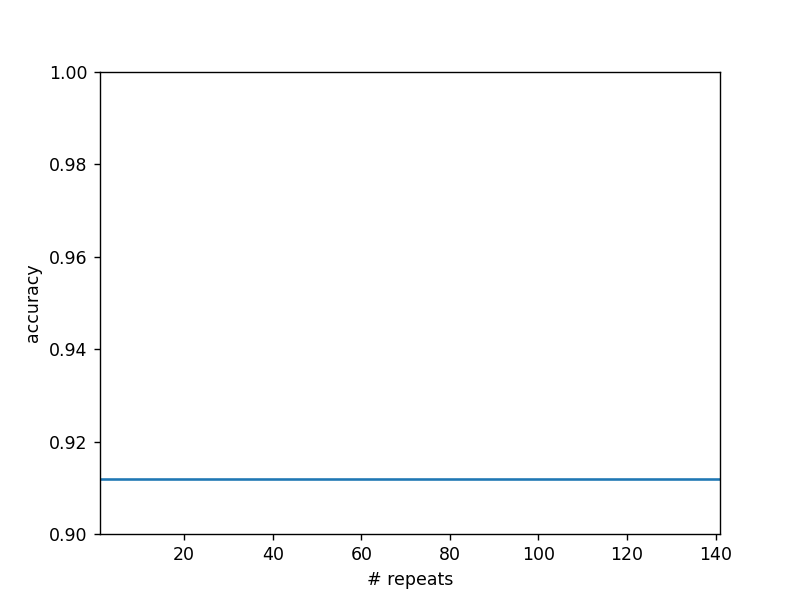

(1.0, 141.0)

In [60]:
plt.plot(repeates,ys);
plt.xlabel("# repeats")
plt.ylabel("accuracy")
plt.ylim([0.9,1])
plt.xlim([1,141])

In [18]:
np.dot([[0.15]], [[1, 5, 1, 51, 10, 0, 1]])

array([[0.15, 0.75, 0.15, 7.65, 1.5 , 0.  , 0.15]])